## Importing data

In [1]:
import pandas as pd

# URL of the Iris dataset in CSV format
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Define column names
column_names = ['SL', 'SW', 'PL', 'PW', 'Class']

# Load the dataset
iris_df = pd.read_csv(url, header=None, names=column_names)

# Display the first few rows of the DataFrame
print(iris_df.head())

    SL   SW   PL   PW        Class
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


In [2]:
# Find the unique species
unique_species = iris_df['Class'].unique()

# Count the number of unique species
num_species = len(unique_species)

# Display the number of unique species
print(f'There are {num_species} different species in the dataset: {unique_species}')

There are 3 different species in the dataset: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [3]:
# Display the first few rows of the DataFrame
print(iris_df.head())

# Provide a summary of the DataFrame
print(iris_df.info())

# Generate descriptive statistics
print(iris_df.describe())

# Get the dimensions of the DataFrame
print(f'The DataFrame has {iris_df.shape[0]} rows and {iris_df.shape[1]} columns.')

# List the column names
print(f'The columns in the DataFrame are: {iris_df.columns.tolist()}')

    SL   SW   PL   PW        Class
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SL      150 non-null    float64
 1   SW      150 non-null    float64
 2   PL      150 non-null    float64
 3   PW      150 non-null    float64
 4   Class   150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
               SL          SW          PL          PW
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.054000    3.758667    1.198667
std      0.828066    0.433594    1.764420    0.763161
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1

## visualizing data: Exploring data

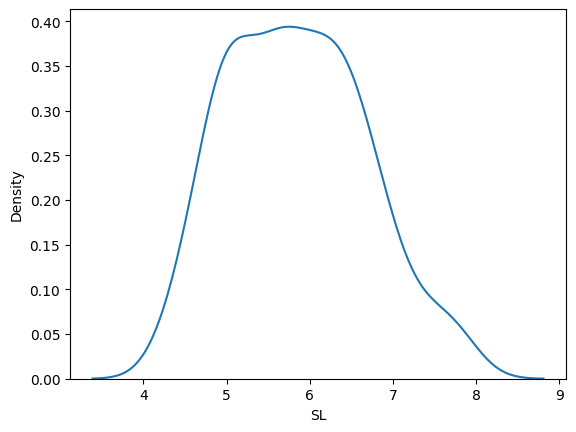

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a KDE plot for the Sepal Length (SL) feature
sns.kdeplot(data=iris_df, x='SL')

# Display the plot
plt.show()

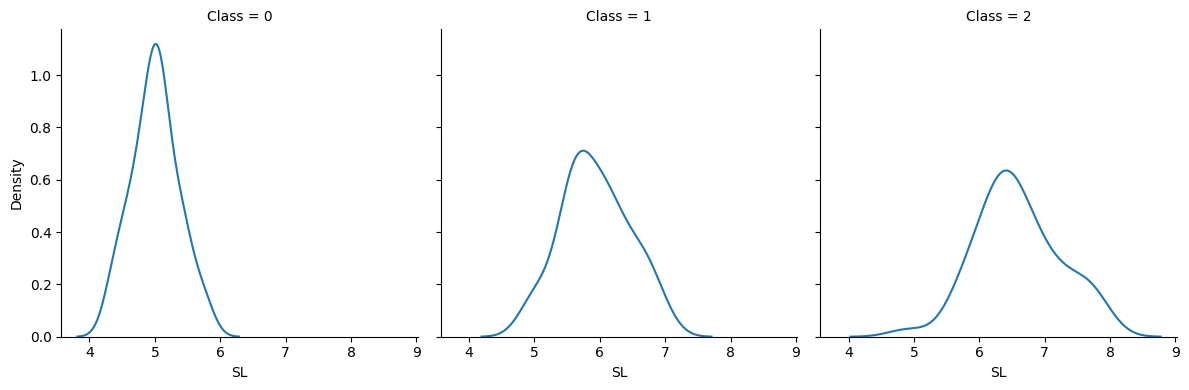

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a FacetGrid for the KDE plots, separated by species
g = sns.FacetGrid(iris_df, col='Class', col_wrap=3, height=4)

# Map the KDE plot to the grid
g.map(sns.kdeplot, 'SL')

# Display the plot
plt.show()

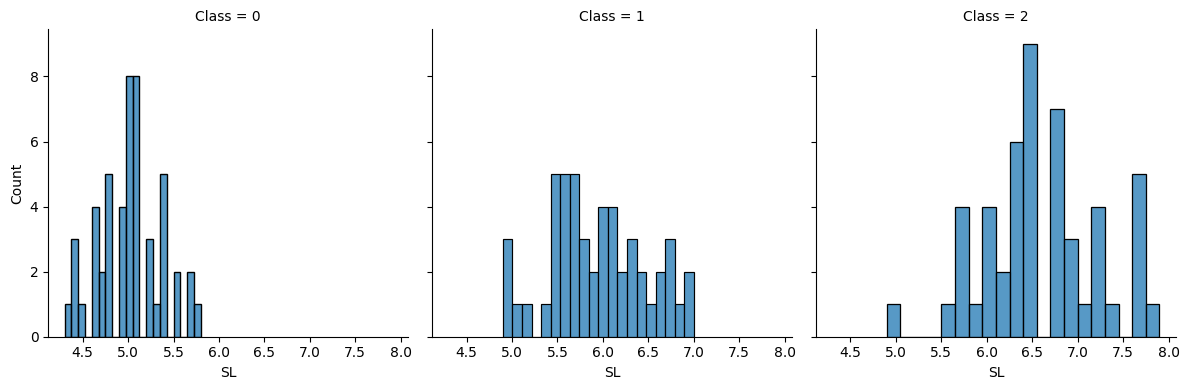

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a FacetGrid for the histogram plots, separated by species
g = sns.FacetGrid(iris_df, col='Class', col_wrap=3, height=4)

# Map the histogram plot to the grid
g.map(sns.histplot, 'SL', bins=20, kde=False)

# Display the plot
plt.show()

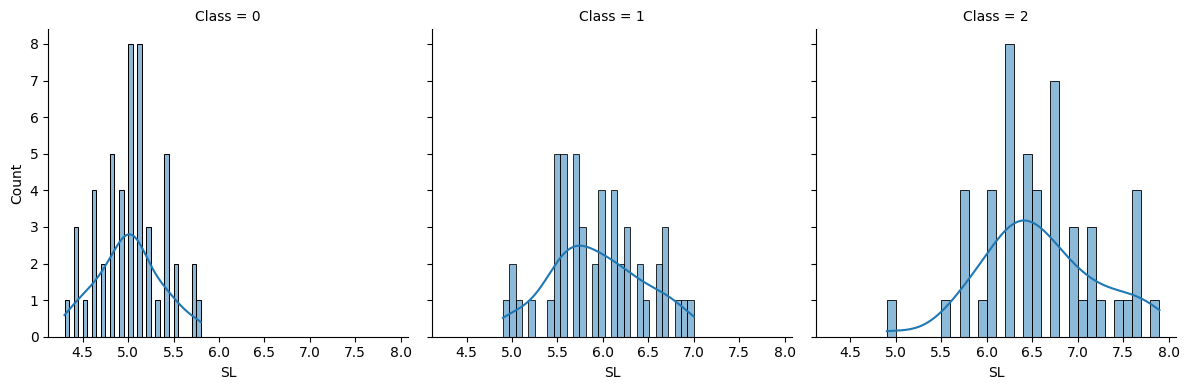

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a FacetGrid for the histogram plots, separated by species
g = sns.FacetGrid(iris_df, col='Class', col_wrap=3, height=4)

# Map the histogram plot to the grid with more bins and KDE enabled
g.map(sns.histplot, 'SL', bins=30, kde=True)

# Display the plot
plt.show()

## Model Training and Testing

A machine learning model can be trained in supervised fashion where we provide a large number of examples, and these examples mainly consist of input and output pairs. In this case, our input are the values of the four features and the output is the class of the species.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [14]:
# pre process the data

# Map species names to numerical values
species_mapping = {species: idx for idx, species in enumerate(iris_df['Class'].unique())}
iris_df['Class'] = iris_df['Class'].map(species_mapping)

# Split the data into features and target variable
X = iris_df.drop('Class', axis=1)
y = iris_df['Class']

In [15]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# we have take 20% of the data for testing and 80% for training as shown by test_size=0.2

In [16]:
# Train the model

# Initialize the RandomForestClassifier
model = RandomForestClassifier(random_state=44)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=44)

In [18]:
# Evaluate model

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



    SL   SW   PL   PW      species
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SL       150 non-null    float64
 1   SW       150 non-null    float64
 2   PL       150 non-null    float64
 3   PW       150 non-null    float64
 4   species  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
               SL          SW          PL          PW
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.054000    3.758667    1.198667
std      0.828066    0.433594    1.764420    0.763161
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.3500

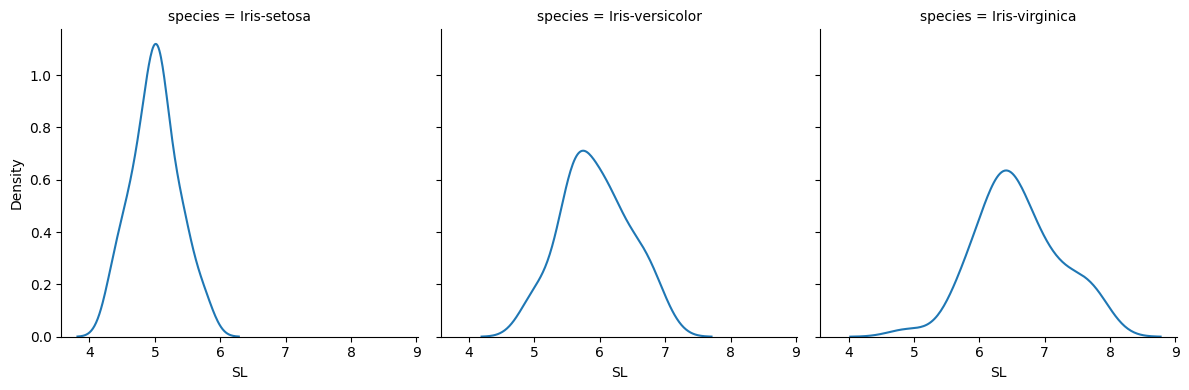

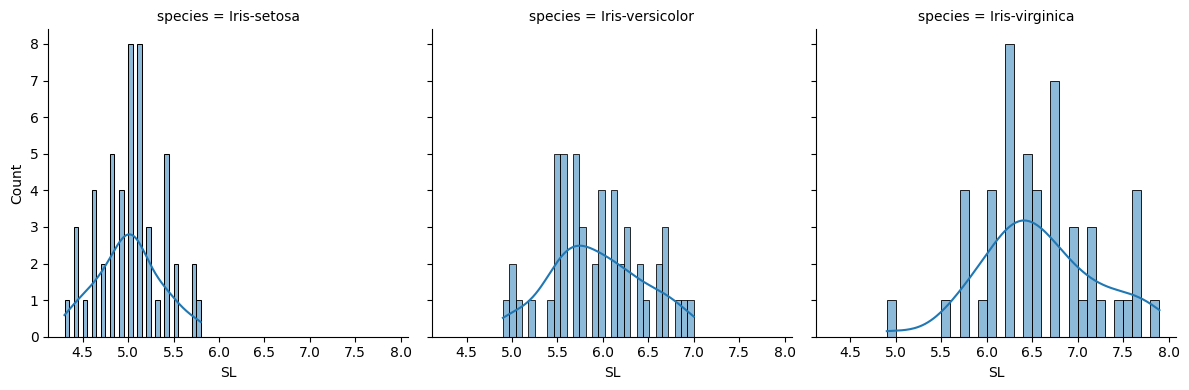

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Predicted class: 0


c:\Users\swagg\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['SL', 'SW', 'PL', 'PW', 'species']
iris_df = pd.read_csv(url, header=None, names=column_names)

# Step 2: Exploratory Data Analysis (EDA)
# Display the first few rows of the DataFrame
print(iris_df.head())

# Provide a summary of the DataFrame
print(iris_df.info())

# Generate descriptive statistics
print(iris_df.describe())

# Get the dimensions of the DataFrame
print(f'The DataFrame has {iris_df.shape[0]} rows and {iris_df.shape[1]} columns.')

# List the column names
print(f'The columns in the DataFrame are: {iris_df.columns.tolist()}')

# Plot KDE plots for Sepal Length (SL) feature, separated by species
g = sns.FacetGrid(iris_df, col='species', col_wrap=3, height=4)
g.map(sns.kdeplot, 'SL')
plt.show()

# Plot detailed histogram plots for Sepal Length (SL) feature, separated by species
g = sns.FacetGrid(iris_df, col='species', col_wrap=3, height=4)
g.map(sns.histplot, 'SL', bins=30, kde=True)
plt.show()

# Step 3: Preprocess Data
# Map species names to numerical values
species_mapping = {species: idx for idx, species in enumerate(iris_df['species'].unique())}
iris_df['species'] = iris_df['species'].map(species_mapping)

# Split the data into features and target variable
X = iris_df.drop('species', axis=1)
y = iris_df['species']

# Step 4: Split Data
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Model
# Initialize the RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Step 6: Evaluate Model
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(y_test, y_pred))

# Step 7: Make Predictions
# Example of making a prediction
sample_data = [[5.1, 3.5, 1.4, 0.2]]  # Example input
predicted_class = model.predict(sample_data)
print(f'Predicted class: {predicted_class[0]}')